In [60]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Evaluation of Machine Learning Models:

Area under ROC curves:

In [20]:
prediction_lr_word2vec = model_lr_word2vec.transform(DF_test)
prediction_gbt_word2vec = model_gbt_word2vec.transform(DF_test)
prediction_lr_hashtf = model_lr_hashtf.transform(DF_test)
prediction_gbt_hashtf = model_gbt_hashtf.transform(DF_test)

evaluator = BinaryClassificationEvaluator(labelCol='Truthness')

print('LR, Word2Vec: ',evaluator.evaluate(prediction_lr_word2vec))
print('GBT, Word2Vec: ',evaluator.evaluate(prediction_gbt_word2vec))
print('LR, HashingTF: ',evaluator.evaluate(prediction_lr_hashtf))
print('GBT, HashingTF: ',evaluator.evaluate(prediction_gbt_hashtf))

LR, Word2Vec:  0.9892886758693183
GBT, Word2Vec:  0.9578940242388466
LR, HashingTF:  0.9822348545142507
GBT, HashingTF:  0.9657035070853843


Accuracy:

In [21]:
accuracy_lr_word2vec = prediction_lr_word2vec.filter(prediction_lr_word2vec.Truthness == prediction_lr_word2vec.prediction).count() / float(prediction_lr_word2vec.count())
accuracy_gbt_word2vec = prediction_gbt_word2vec.filter(prediction_gbt_word2vec.Truthness == prediction_gbt_word2vec.prediction).count() / float(prediction_gbt_word2vec.count())
accuracy_lr_hashtf = prediction_lr_hashtf.filter(prediction_lr_hashtf.Truthness == prediction_lr_hashtf.prediction).count() / float(prediction_lr_hashtf.count())
accuracy_gbt_hashtf = prediction_gbt_hashtf.filter(prediction_gbt_hashtf.Truthness == prediction_gbt_hashtf.prediction).count() / float(prediction_gbt_hashtf.count())

print('Accuracy:\n')
print('LR, Word2Vec: ', accuracy_lr_word2vec)
print('GBT, Word2Vec: ', accuracy_gbt_word2vec)
print('LR, HashingTF: ', accuracy_lr_hashtf)
print('GBT, HashingTF: ', accuracy_gbt_hashtf)

Accuracy:

LR, Word2Vec:  0.9510019819423035
GBT, Word2Vec:  0.8816340013212949
LR, HashingTF:  0.9241356529398811
GBT, HashingTF:  0.9003523452983925


Accuracy on TestSet.csv:

In [24]:
TestSet = pd.read_csv('TestSet.csv')
TestSetSpark = sc.createDataFrame(TestSet)
TestSetSpark.show()

+--------------------+---------+
|                text|Truthness|
+--------------------+---------+
|Ime Udoka, head c...|        1|
|The Artemis I roc...|        1|
|Stefanos Tsitsipa...|        1|
|Arguing that the ...|        0|
|Addressing a rall...|        0|
|Citing a lack of ...|        0|
|California Gov. G...|        1|
|Pete Antonacci, t...|        1|
|An Arizona Superi...|        1|
|The Department of...|        1|
|Wyoming GOP Rep. ...|        1|
|Rihanna will head...|        1|
|A twelve-year-old...|        1|
|Clicking back and...|        0|
|Expressing shock ...|        0|
|Saying those unab...|        0|
|Assuring the nati...|        0|
|Muttering in frus...|        0|
|Wondering if anyo...|        0|
|Having not yet co...|        0|
+--------------------+---------+



In [25]:
# rerun entire pipelines for ML model testing on TestSet.csv
testsetpipeline1 = Pipeline(stages=[textTokenizer,stopwords,text_w2v,text_norm])
testsetpipeline2 = Pipeline(stages=[textTokenizer,stopwords,text_hash])

TestSetSpark_mod1 = testsetpipeline1.fit(TestSetSpark).transform(TestSetSpark)
TestSetSpark_mod2 = testsetpipeline2.fit(TestSetSpark).transform(TestSetSpark)

prediction2_lr_word2vec = model_lr_word2vec.transform(TestSetSpark_mod1)
prediction2_gbt_word2vec = model_gbt_word2vec.transform(TestSetSpark_mod1)
prediction2_lr_hashtf = model_lr_hashtf.transform(TestSetSpark_mod2)
prediction2_gbt_hashtf = model_gbt_hashtf.transform(TestSetSpark_mod2)

In [26]:
accuracy2_lr_word2vec = prediction2_lr_word2vec.filter(prediction2_lr_word2vec.Truthness == prediction2_lr_word2vec.prediction).count() / float(prediction2_lr_word2vec.count())
accuracy2_gbt_word2vec = prediction2_gbt_word2vec.filter(prediction2_gbt_word2vec.Truthness == prediction2_gbt_word2vec.prediction).count() / float(prediction2_gbt_word2vec.count())
accuracy2_lr_hashtf = prediction2_lr_hashtf.filter(prediction2_lr_hashtf.Truthness == prediction2_lr_hashtf.prediction).count() / float(prediction2_lr_hashtf.count())
accuracy2_gbt_hashtf = prediction2_gbt_hashtf.filter(prediction2_gbt_hashtf.Truthness == prediction2_gbt_hashtf.prediction).count() / float(prediction2_gbt_hashtf.count())

print('Accuracy:\n')
print('LR, Word2Vec: ', accuracy2_lr_word2vec)
print('GBT, Word2Vec: ', accuracy2_gbt_word2vec)
print('LR, HashingTF: ', accuracy2_lr_hashtf)
print('GBT, HashingTF: ', accuracy2_gbt_hashtf)

Accuracy:

LR, Word2Vec:  0.5
GBT, Word2Vec:  0.5
LR, HashingTF:  0.6
GBT, HashingTF:  0.45


So this is definitely not good.

In [27]:
prediction2_lr_word2vec.select(['text','Truthness','prediction']).show()
prediction2_gbt_word2vec.select(['text','Truthness','prediction']).show()
prediction2_lr_hashtf.select(['text','Truthness','prediction']).show()
prediction2_gbt_hashtf.select(['text','Truthness','prediction']).show()
# this will show the entire tables, since there are only 20 articles

+--------------------+---------+----------+
|                text|Truthness|prediction|
+--------------------+---------+----------+
|Ime Udoka, head c...|        1|       1.0|
|The Artemis I roc...|        1|       1.0|
|Stefanos Tsitsipa...|        1|       1.0|
|Arguing that the ...|        0|       1.0|
|Addressing a rall...|        0|       1.0|
|Citing a lack of ...|        0|       1.0|
|California Gov. G...|        1|       1.0|
|Pete Antonacci, t...|        1|       1.0|
|An Arizona Superi...|        1|       1.0|
|The Department of...|        1|       1.0|
|Wyoming GOP Rep. ...|        1|       1.0|
|Rihanna will head...|        1|       1.0|
|A twelve-year-old...|        1|       1.0|
|Clicking back and...|        0|       1.0|
|Expressing shock ...|        0|       1.0|
|Saying those unab...|        0|       1.0|
|Assuring the nati...|        0|       1.0|
|Muttering in frus...|        0|       1.0|
|Wondering if anyo...|        0|       1.0|
|Having not yet co...|        0|

So the word2vec algorithms (first two tables) predicted everything True in TestSet.csv.  Perhaps the Onion articles were a little too difficult given the satirical and 'real-sounding' nature of them.

The HashingTF algorithms did make different predictions.  In the LR Hashing case (third table), it predicted 6/10 True articles correct and 6/10 Fake articles correct.

In the GBT Hashing case (fourth table), it predicted 7/10 True articles correctly but only 2/10 Fake articles correctly.  At least this case appears to have a good true positive rate.

Evaluation of Neural Network Model:

Accuracy on test subset:

In [22]:
test_numeric = tokenizer.texts_to_sequences(test_x)
test_numeric_padded = pad_sequences(test_numeric,maxlen=maxlength)
score = nnmodel.evaluate(test_numeric_padded,test_y)
score[1]

281/281 [==============================] - 4s 11ms/step - loss: 0.0436 - accuracy: 0.9883


0.9883073568344116

This is pretty good.

Accuracy on TestSet.csv:

In [29]:
testset_numeric = tokenizer.texts_to_sequences(TestSet['text'])
testset_numeric_padded = pad_sequences(testset_numeric,maxlen=maxlength)
score = nnmodel.evaluate(testset_numeric_padded,TestSet['Truthness'])
score[1]

1/1 [==============================] - 0s 27ms/step - loss: 2.3347 - accuracy: 0.5500


0.550000011920929

This however, much like the ML models above with TestSet.csv, is not so good.

In [35]:
print(nnmodel.predict(testset_numeric_padded,verbose=1))
print(TestSet['Truthness'])

1/1 [==============================] - 0s 24ms/step
[[0.9990616 ]
 [0.99815124]
 [0.08657873]
 [0.949527  ]
 [0.04332609]
 [0.9990277 ]
 [0.9991571 ]
 [0.99926466]
 [0.9979581 ]
 [0.9990293 ]
 [0.9967133 ]
 [0.00583255]
 [0.00227563]
 [0.9967611 ]
 [0.9948659 ]
 [0.03549943]
 [0.99750704]
 [0.05245351]
 [0.12646621]
 [0.9970225 ]]
0     1
1     1
2     1
3     0
4     0
5     0
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    0
14    0
15    0
16    0
17    0
18    0
19    0
Name: Truthness, dtype: int64


After carefully comparing the two tables, one can see that this model predicted 7/10 True articles correctly, but only 4/10 Fake articles correctly for TestSet.csv.  So it performed very similarly to the GBT Hashing model above.

In summary, True.csv consisting of Reuters articles only is likely biasing what the algorithms perceive as True.  In addition, many of the articles from Fake.csv appear to be op-ed style articles, and not necessarily articles with declaratively false elements (they are false in the sense that they are subjective and likely have a higher prevalence of adjectives).  These are likely easier to distinguish.  On the other hand, Onion articles from TestSet.csv, as satire, likely don't read as op-ed style articles.  They often make declaratively false statements and thus may be more difficult to distinguish from True articles which make declaratively true statements.

So the models may be thinking: if news-style, then True; else if op-ed style, then Fake.

Returning back to the original big set of data, here we will build a barplot to see the breakdown of the confusion matrix elements for the 5 models:

In [45]:
# first we build the confusion matrices for each model using confusionMatrix() from pyspark.mllib
lr_word2vec_matrix = MulticlassMetrics(prediction_lr_word2vec.select('Truthness','prediction').rdd.map(tuple)).confusionMatrix().toArray()
gbt_word2vec_matrix = MulticlassMetrics(prediction_gbt_word2vec.select('Truthness','prediction').rdd.map(tuple)).confusionMatrix().toArray()
lr_hashtf_matrix = MulticlassMetrics(prediction_lr_hashtf.select('Truthness','prediction').rdd.map(tuple)).confusionMatrix().toArray()
gbt_hashtf_matrix = MulticlassMetrics(prediction_gbt_hashtf.select('Truthness','prediction').rdd.map(tuple)).confusionMatrix().toArray()
# use confusion_matrix from sklearn for NN model since this one was "in memory",
# note: the data in nnmodel.predict is probabilities, so we round it with np.around for the prediction
lstm_matrix = confusion_matrix(np.around(nnmodel.predict(test_numeric_padded)), test_y)

281/281 [==============================] - 3s 11ms/step


In [62]:
# build a dataframe with which to plot confusion matrix frequencies
# 20x3 dataframe with columns 'Category', 'Frequency', and 'Model'
matrices = [lr_word2vec_matrix, gbt_word2vec_matrix, lr_hashtf_matrix, gbt_hashtf_matrix, lstm_matrix]
categories = 5*['True Positives']+5*['False Positives']+5*['False Negatives']+5*['True Negatives']
matrix_names = 4*['LR-Word2Vec','GBT-Word2Vec','LR-HashTF','GBT-HashTF','LSTM NN']
TP = [matrix[0,0] for matrix in matrices]
FP = [matrix[0,1] for matrix in matrices]
FN = [matrix[1,0] for matrix in matrices]
TN = [matrix[1,1] for matrix in matrices]
cm_dict = {'Category':categories, 'Frequency':TP+FP+FN+TN, 'Model':matrix_names}
DF_CM = pd.DataFrame(cm_dict)
DF_CM

,Category,Frequency,Model
0,True Positives,4487.0,LR-Word2Vec
1,True Positives,4194.0,GBT-Word2Vec
2,True Positives,4213.0,LR-HashTF
3,True Positives,4284.0,GBT-HashTF
4,True Positives,4641.0,LSTM NN
5,False Positives,149.0,LR-Word2Vec
6,False Positives,486.0,GBT-Word2Vec
7,False Positives,119.0,LR-HashTF
8,False Positives,406.0,GBT-HashTF
9,False Positives,47.0,LSTM NN


<AxesSubplot:xlabel='Category', ylabel='Frequency'>

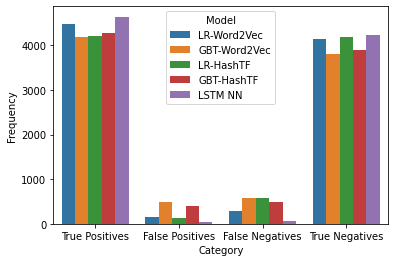

In [61]:
sns.barplot(x='Category',y='Frequency',hue='Model',data=DF_CM)